**Описание того, что мне известно о показателе GINI (в задаче классификации)**

GINI метрика используемая для определения качества классификационной модели.

In [1]:
import pandas as pd
import numpy as np

from sklearn.metrics import roc_curve, auc

import matplotlib.pyplot as plt

from statsmodels.distributions.empirical_distribution import ECDF
np.random.seed(10)

# Сдержание:

1. [Базовое опеределение GINI](#basic_gini_header);
2. [Связь GINI c ROC](#gini_relation_with_roc_header).

# Базовое определение GINI
<a id="basic_gini_header"></a>
Обычно GINI определяют через <a href="https://github.com/Dranikf/knowledge_bank/blob/main/machine_learning/classification_task/metrics/CAP/CAP.ipynb">CAP кривую</a>.<br>
GINI для некоторой модели, это отношение площадей между CAP кривой модели и случайной CAP кривой к площади между идеальной CAP и случайной CAP.

### **Покажем на рисунке**:

In [2]:
plot_ss = 10000

np.random.seed(3)
random_range = np.random.rand(plot_ss)

plot_data = pd.DataFrame({
    "p_hat" : random_range,
    "y" : map(
        lambda r_val: np.random.choice(
            [0, 1], p = [1 - r_val, r_val]
        ), 
        random_range
    )
})

plot_data.sort_values("y",inplace = True, ascending = False)
plot_data["p_hat_ideal"] = np.linspace(1,0, plot_data.shape[0])


fpr, or_tpr, t = roc_curve(
    plot_data["y"], plot_data["p_hat"],
    drop_intermediate = False
)
fpr, id_tpr, t = roc_curve(
    plot_data["y"], plot_data["p_hat_ideal"],
    drop_intermediate = False
)

CAP_x = np.arange(len(or_tpr))/len(or_tpr)

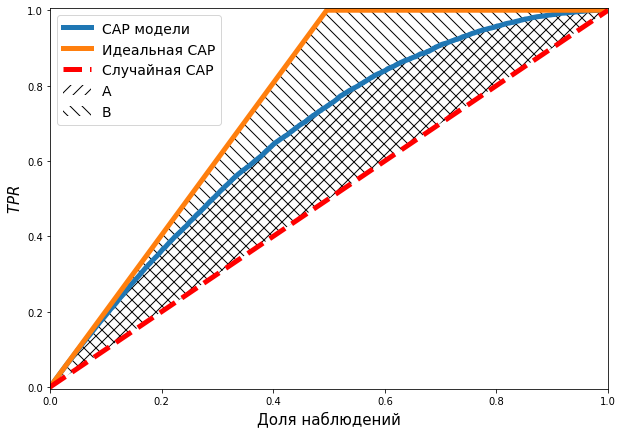

In [3]:
plt.figure(figsize = [10,7])
plt.plot(CAP_x, or_tpr, linewidth = 5)
plt.plot(CAP_x, id_tpr, linewidth = 5)
plt.plot(
    [0,1], [0,1], color = "red", 
    linestyle = "dashed",
    linewidth = 5
)

plt.fill_between(
    np.arange(len(or_tpr))/len(or_tpr),
    or_tpr,
    np.arange(len(or_tpr))/len(or_tpr),
    hatch = "//",
    alpha = 0
)
plt.fill_between(
    np.arange(len(or_tpr))/len(or_tpr),
    id_tpr,
    np.arange(len(or_tpr))/len(or_tpr),
    hatch = "\\\\",
    alpha = 0
)

plt.xlabel("Доля наблюдений", fontsize = 15)
plt.ylabel("$TPR$", fontsize = 15)

plt.xlim([0,1])
plt.ylim([-0.005,1.005])

plt.legend(
    [
        "CAP модели", "Идеальная CAP", 
        "Случайная CAP", "A", "B"
    ],
    fontsize = 14
)

Следуя обозначениям площадей на рисунке, получаем:

$$GINI = \frac{A}{B}$$

**Или испозуя альтернативное обозначение площадей (по, пока, незвенстной причине особенно популярное)**

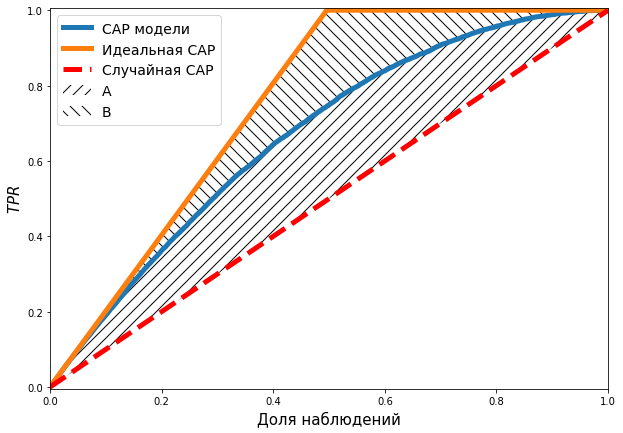

In [4]:
plt.figure(figsize = [10,7])
plt.plot(CAP_x, or_tpr, linewidth = 5)
plt.plot(CAP_x, id_tpr, linewidth = 5)
plt.plot(
    [0,1], [0,1], color = "red", 
    linestyle = "dashed",
    linewidth = 5
)

plt.fill_between(
    np.arange(len(or_tpr))/len(or_tpr),
    or_tpr,
    np.arange(len(or_tpr))/len(or_tpr),
    hatch = "//",
    alpha = 0
)
plt.fill_between(
    np.arange(len(or_tpr))/len(or_tpr),
    id_tpr,
    or_tpr,
    hatch = "\\\\",
    alpha = 0
)

plt.xlabel("Доля наблюдений", fontsize = 15)
plt.ylabel("$TPR$", fontsize = 15)

plt.xlim([0,1])
plt.ylim([-0.005,1.005])

ans = plt.legend(
    [
        "CAP модели", "Идеальная CAP", 
        "Случайная CAP", "A", "B"
    ],
    fontsize = 14
)


$$GINI = \frac{A}{B+A}$$

# Связь GINI c ROC
<a id="gini_relation_with_roc_header"></a>
Есть альтернативный способ подсчитать $GINI$ - через ROC кривую.

### Аналитическое доказательсво

В качесве примера возьмем таблицу которую использовали при рассмотрении <a href="https://github.com/Dranikf/knowledge_bank/blob/main/machine_learning/classification_task/metrics/CAP/CAP.ipynb">CAP кирвой</a>. Каждое полученное тождество буду сверять с этим примером, для того, что-бы быть уверенным, в том, что в процессе не допущено ошибок.

|$i$| $\hat{p}_i$  | $$y_i$$ |$$i/n$$|$$TPR_i$$|$$FPR_i$$|
|---| ------------ | --------|-------|---------|---------|
| 1 |     0.8      |    1    |  0.2  |   1/3   |    0    |    
| 2 |     0.7      |    1    |  0.4  |   2/3   |    0    |
| 3 |     0.6      |    0    |  0.6  |   2/3   |   1/2   |
| 4 |     0.4      |    0    |  0.8  |   2/3   |    1    |
| 5 |     0.2      |    1    |   1   |    1    |    1    |

Сразу обозначим, что $FPR_0=TPR_0=0$.

Все массивы примера, что на м понадобиться, загоняем в память компьютера.

In [5]:
n = 5
TPR = np.array([0, 1/3, 2/3, 2/3, 2/3, 1])
FPR = np.array([0, 0, 0, 1/2, 1, 1])
i = np.arange(6)
y = np.array([1,1,0,0,1])

**Запишем площадь под ROC кривой, что и будет показателем $AUC_{roc}$**:

$$AUC_{roc} = \sum_{i=0}^{n-1} (FPR_{i+1} - FPR_i)(TPR_{i+1} + TPR_i)/2. \tag{1}$$

$GINI$ от сюда выражается:

$$GINI = 2AUC_{roc}-1. \tag{2}$$

In [6]:
auc_roc = np.sum((FPR[1:] - FPR[:-1])*(TPR[1:] + TPR[:-1])/2)
2*auc_roc - 1

0.33333333333333326

**Запишем площадь под дейсвтительной CAP кривой**:

$$AUC_{cap} = \sum_{i=0}^{n-1}([i+1]/n - i/n)(TPR_{i+1} + TPR_i)/2 = \sum_{i=0}^{n-1}(TPR_{i+1} + TPR_i)/2n.$$

Тогда площадь между случайной CAP кривой и действительной CAP кривой будет выражаться так:

$$AUC_{cap}' = \sum_{i=0}^{n-1}(TPR_{i+1} + TPR_i)/2n - 0.5.\tag{3}$$

Подсчитаем эту величину, для нашего примера:

In [7]:
AUC_cap = sum((i[1:]/n - i[:-1]/n)*(TPR[1:] + TPR[:-1])/2) - 0.5
AUC_cap

0.06666666666666654

К записи **площади под идеальной CAP** кривой лучше подойти с геометрической точки зрения:

Text(0.5, 0, 'Доля наблюдений')

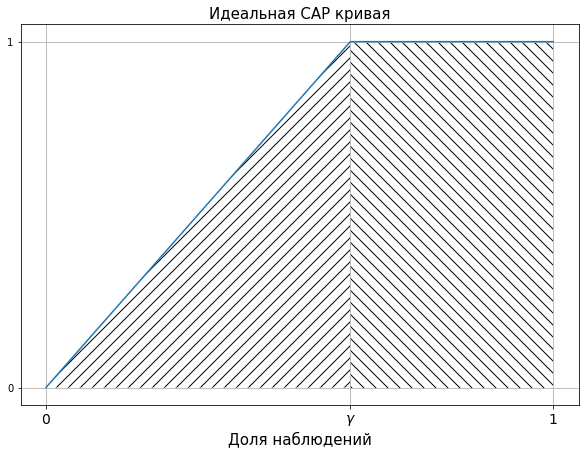

In [8]:
y_rel_ideal = [0, 1/3, 2/3, 1, 1, 1]
x_rel = [i/5 for i in range(6)]

plt.figure(figsize = [10, 7])

plt.plot(x_rel, y_rel_ideal)
plt.fill_between(
    [0, 0.6], [0, 1], [0,0],
    alpha = 0, hatch = "//"
)
plt.fill_between(
    [0.6, 1], [0, 0], [1,1],
    alpha = 0, hatch = "\\\\"
)

plt.yticks([0, 1])
plt.xticks(
    [0, 0.6, 1],
    ["0", "$\gamma$", "1"],
    fontsize = 14
)

plt.title(
    "Идеальная CAP кривая",
    fontsize = 15
)

plt.grid()
plt.xlabel("Доля наблюдений", fontsize = 15)

Где $\gamma$ - доля наблюдений с проявлением признака:

$$\gamma = \frac{\sum_{i=1}^ny_i}{n}.$$

Эта площадь раскладывается на 2 фигуры:
- Треугольник, выделенный штриховкой наклоненной влево;
- Прямоугольник, выделейнный штрифовной наклоненной вправо.

Очевидно такую площадь можно записать:

$$AUC^I = \gamma/2 + (1-\gamma) = 1 - \gamma/2.$$

Тогда площадь можду идеальной CAP кривой и случайной CAP кривой составит:

$$AUC'^I = 1 + \gamma/2 - 0.5=0.5 - \gamma/2.$$


Или подставляя $\gamma$:

$$AUC'^I = 0.5 - \frac{\sum_{i=1}^{n}y_i}{2n}.\tag{4}$$

Подсчитаем значение, принимаемое данной величиной, для нашего примера:

In [9]:
AUC_I = 0.5-sum(y)/(2*n)
AUC_I

0.2

**Тогда $GINI$ через CAP кривую**:

$$GINI = \frac{AUC_{cap}'}{AUC'^I}. \tag{5}$$

Убедимся, что он совпадает с числом полученным через ROC:

In [10]:
AUC_cap/AUC_I

0.3333333333333327

И так, **для доказательства нам следуем показать** равенство выражений $(2),(5)$, подставив туда $(1),(3),(4)$ или:

$$2AUC_{roc}-1 = \frac{AUC_{cap}'}{AUC'^I} \Leftrightarrow$$
$$\Leftrightarrow 2\left[\sum_{i=0}^{n-1} (FPR_{i+1} - FPR_i)(TPR_{i+1} + TPR_i)/2\right] -1 = 
\frac{
    \sum_{i=0}^{n-1}(TPR_{i+1} + TPR_i)/2n - \frac{1}{2}
}{
    \frac{1}{2} - \frac{\sum_{i=1}^{n}y_i}{2n}
} \Leftrightarrow \tag{6}$$

$$\Leftrightarrow \left[\sum_{i=0}^{n-1} (FPR_{i+1} - FPR_i)(TPR_{i+1} + TPR_i)\right] -1 = 
\frac{
    \sum_{i=0}^{n-1}(TPR_{i+1} + TPR_i)/2n - \frac{1}{2}
}{
    \frac{1}{2} - \frac{\sum_{i=1}^{n}y_i}{2n}
}$$

Будем работать с правой частью тождества:

$$\frac{
    \sum_{i=0}^{n-1}(TPR_{i+1} + TPR_i)/2n - \frac{1}{2}
}{
    \frac{1}{2} - \frac{\sum_{i=1}^{n}y_i}{2n}
}=$$

$$=\frac{
    \sum_{i=0}^{n-1}(TPR_{i+1} + TPR_i)/2n - \frac{1}{2}
}{
    \frac{n - \sum_{i=1}^{n}y_i}{2n}
}=$$

$$=\frac{
    \left[\sum_{i=0}^{n-1}(TPR_{i+1} + TPR_i)\right] - n
}{
    n - \sum_{i=1}^{n}y_i
}=$$

$$
=\left[\sum^{n-1}_{i=0} 
    \frac{1}{n - \sum_{i=1}^{n}y_i}(TPR_{i+1}+TPR_i)
    \right] - \frac{n}{n - \sum_{i=1}^{n}y_i}
\tag{7}
$$

Убедимся на числах, что проделанные пребразования корректны.

In [11]:
(sum(TPR[1:] + TPR[:-1])-n)/(n-sum(y))

0.33333333333333304

Будем работать с левой частью тождества:

$$
\left[\sum_{i=0}^{n-1} (FPR_{i+1} - FPR_i)(TPR_{i+1} + TPR_i)\right] -1 \tag{8}
$$

Обсудим свойсва выражения:

$$
(FPR_{i+1} - FPR_i)
$$

$FPR$ (доля ложно положительных предсказаний) прирастает только для предсказаний без проявления признака. А, для наблюдения без проявления признака, прирастает на долю, которую занимает одно набллюдение без проявления признка:

$$
(FPR_{i+1} - FPR_i)=\begin{cases}
    0, y_i=1;\\
    \frac{1}{n-\sum_i^n y_i}, y_i=0.
\end{cases}
$$

*Где $n-\sum_i^n y_i$ - число наблюдений без проявления признака, тогда:*

*$$\frac{1}{n-\sum_i^n y_i}$$*

*доля в одного наблюдения в наблюдениях с проявлением признака.*

Тогда выражение $(8)$ может быть переписано следующим образом:

$$
\left[\sum_{i|y_{i+1}=0} \frac{1}{\sum_{i=1}^n n-y_i}(TPR_{i+1} + TPR_i)\right] -1
\tag{9}
$$

*То есть суммирование можно произвести только для членов, для которых $y_{i+1}=0$, все остальные будут равняться нулю. При том в не нулевых членнах один из множителей - константа относительно оператора суммирования.*

Убедимся, что проделанные преобразования корректны:

In [12]:
np.sum(
    (1/(n - sum(y)))*\
    (TPR[1:][y==0] + TPR[:-1][y==0])
) - 1

0.33333333333333326

Теперь допустим, что тождество $(6)$ верно. Тогда, учитвая во внимание, последние результаты $(7), (9)$:

$$
\left[\sum^{n-1}_{i=0} 
    \frac{1}{n - \sum_{i=1}^{n}y_i}(TPR_{i+1}+TPR_i)
    \right] - \frac{n}{n - \sum_{i=1}^{n}y_i}
=
\left[\sum_{i|y_{i+1}=0} \frac{1}{n-\sum_{i=1}^n y_i}(TPR_{i+1} + TPR_i)\right] -1
 \Leftrightarrow \tag{10}$$

$$
\Leftrightarrow
\left[\sum^{n-1}_{i=0} 
    \frac{1}{n - \sum_{i=1}^{n}y_i}(TPR_{i+1}+TPR_i)
    \right] - 
    \left[\sum_{i|y_{i+1}=0} \frac{1}{n-\sum_{i=1}^n y_i}(TPR_{i+1} + TPR_i)\right] -
    \frac{n}{n - \sum_{i=1}^{n}y_i} + 1
= 0
$$

Обратите внимание на выражения в квадратных скобках - они полностью совпадают, отличается лишь число компонент суммирования, т.е. после вычитания остануться только те компоненты которых нет в вычитаемом:


$$
\left[
    \sum_{i|y_{i+1}=1} \frac{1}{n-\sum_{i=1}^n y_i}(TPR_{i+1} + TPR_i)
\right] -
    \frac{n}{n - \sum_{i=1}^{n}y_i} + 1
= 0
$$

Убедисмя, что представленное равенстно верно:

In [13]:
sum(
   (1/(n-sum(y)))*(TPR[1:][y==1] + TPR[:-1][y==1])
) -\
n/(n-sum(y)) + 1

0.0

Далее можно провести рад преобразований над полученным выражением:

$$
\left[
    \sum_{i|y_{i+1}=1} \frac{1}{n-\sum_{i=1}^n y_i}(TPR_{i+1} + TPR_i)
\right] -
    \frac{n}{n - \sum_{i=1}^{n}y_i} + 1
= 0 \Leftrightarrow
$$

$$
\Leftrightarrow
\left[
    \sum_{i|y_{i+1}=1} \frac{1}{n-\sum_{i=1}^n y_i}(TPR_{i+1} + TPR_i)
\right] -
    \frac{\sum_{i=1}^{n}y_i}{n - \sum_{i=1}^{n}y_i}
= 0
\Leftrightarrow
$$

$$
\Leftrightarrow
\frac{1}{n-\sum_{i=1}^n y_i}
\left\{
    \left[
        \sum_{i|y_{i+1}=1} (TPR_{i+1} + TPR_i)
    \right] -
       \sum_{i=1}^{n}y_i
\right\}
= 0
$$

Учитывая, что выражение $\frac{1}{n-\sum_{i=1}^n y_i}$ не отрицательное. То для выполнения последнего тождества необходимо, чтобы:

$$
\left[
    \sum_{i|y_{i+1}=1} (TPR_{i+1} + TPR_i)
\right] -
   \sum_{i=1}^{n}y_i
=0 \tag{11}$$

Рассмотрим сумму в квадратных скобрах:<br>

$$\sum_{i|y_{i+1}=1} (TPR_{i+1} + TPR_i)$$

Перепишем её проще, но держа в памяти, что суммирование проводится только по наблюдениям с проявлением признака:

$$\sum_{i=0}^{m-1} (TPR_{i+1} + TPR_i)$$

Где $m=\sum_{i=1}^{n}y_i$.

Теперь вспомним, что $TPR$ это доля клиентов, с проявлением, признака для которых было предсказано проявление признака. Получается, что для каждого клиента с проявлением признака $TPR$ возрастает на $\frac{1}{m}$. Тогда в данной сумме. можно записать, что:

$$
\sum_{i=0}^{m-1} \left(\frac{i+1}{m} + \frac{i}{m}\right)=
\sum_{i=0}^{m-1} \left(\frac{2i+1}{m}\right)
$$

Возвращаясь к тождеству $(10)$ и используя нововведенные обозначения:

$$
\sum_{i=0}^{m-1} \left(\frac{2i+1}{m}\right)=m\Leftrightarrow
\sum_{i=0}^{m-1} 2i+1 = m^2
\tag{12}
$$

Доказав это пождество мы докажем, что выполняется вся цепочка тождеств выше. Есть уже очень похожее доказательсво, представленное <a href="https://math.stackexchange.com/questions/2507815/finding-the-formula-for-the-summation-sum-i-1n-2i-1-135-2n-1?newreg=662a6da934824f24ad28bdbb360d918d">тут</a>. Но мы его приведдем для нашего примера:

Распишем выражение:

$$\sum_{i=0}^{m-1} 2i+1 = 1 + 3 + 5 + ... + 2(m-1)+1.$$

Тут не хватает четных чисел в суммации добавим и отнимем их:

$$\sum_{i=0}^{m-1} 2i+1 = \{1 + 3 + 5 + ... + [2(m-1)+1]\} + \{2 + 4 + 6 + ... + 2(m-1)\} - \{2 + 4 + 6 + ... + 2(m-1)\}.$$

Объединим и упрядочим компоненты первых и вторых фигурных скобок и вынесем 2 из вторых:

$$\sum_{i=0}^{m-1} 2i+1 = \{1 + 2 + 3 + 4 + ... + 2(m-1) + [2(m-1)+1]\} - 2\{1 + 2 + 3 + ... + (m-1)\}.$$

Возвращаясь к оператом суммирования получаем:

$$\sum_{i=0}^{m-1} 2i+1 = \left[\sum_{i=1}^{2(m-1)+1}i\right] - 2\left[\sum_{i=1}^{m-1}i\right]. \tag{13}$$

Далее надо выразить:

$$\sum_{i=1}^\nu i.$$

<a href="https://r-knott.surrey.ac.uk/runsums/triNbproof.html">Тут</a> можно найти, что:

$$2\sum_{i=1}^\nu i = \sum_{i=1}^\nu i + \sum_{i=1}^\nu i = [1 + 2 + ... + (\nu-1) + \nu] + [\nu + (\nu-1) + ... + 2 + 1]=$$<br>
$$=(\nu+1) + (\nu-1+2) + ... + (2 + \nu - 1) + (\nu+1)=$$<br>
$$=(\nu+1) + (\nu+1) + ... + (\nu+1)=$$<br>
$$=\sum_{i=1}^n (\nu+1) = \nu(\nu+1)$$

И так:

$$2\sum_{i=1}^\nu i = \nu(\nu+1) \Leftrightarrow \sum_{i=1}^\nu i = \frac{\nu(\nu +1)}{2}$$

Тогда, возвращаясь к $(13)$ получаем:
$$
\sum_{i=0}^{m-1} 2i+1 =
$$
$$
=\frac{[2(m-1)+1]([2(m-1)+1] + 1)}{2} - 2\frac{[m-1]([m-1]+1)}{2}=.
$$
$$
=\frac{2m[2m+1]}{2} - [m-1]([m-1]+1)=
$$
$$
=m[2m+1] - m[m-1] =
$$
$$
= 2m^2+m-m^2-m=
$$
$$
= m^2
$$


И так получается, что:

$$\sum_{i=0}^{m-1} 2i+1 = m^2$$

Таким образом, выполняется тождество $(12)$, получается справедливым $(11)$, за ним $(10)$ и окончательно $(6)\boxtimes$.

### Вычислительный экперимент

Предполагается сэмитировать результаты не которого классификатора и подсчитать для него $GINI$ обоими методами, для того, чтобы убедиться, что результат одинаковый.

**Эмитация результата модели**

In [14]:
plot_ss = 10000

np.random.seed(3)
random_range = np.random.rand(plot_ss)

plot_data = pd.DataFrame({
    "p_hat" : random_range,
    "y" : map(
        lambda r_val: np.random.choice(
            [0, 1], p = [1 - r_val, r_val]
        ), 
        random_range
    )
})

plot_data.head()

,p_hat,y
0,0.550798,0
1,0.708148,1
2,0.290905,1
3,0.510828,0
4,0.892947,1


**Вычисление через ROC**

In [15]:
# вычисление точек ROC-кривой
fpr, tpr, t = roc_curve(
    plot_data["y"], plot_data["p_hat"],
    drop_intermediate = False
)
# вычисление GINI через площадь точек под
# ROC кривой
2*auc(fpr, tpr) - 1

0.6599391056843444

**Вычисление через CAP**

In [17]:
plot_data.sort_values("y",inplace = True, ascending = False)
plot_data["p_hat_ideal"] = np.linspace(1,0, plot_data.shape[0])


# вычисление ординат наблюдаемой CAP кривой
_, tpr_real, _= roc_curve(
    plot_data["y"], plot_data["p_hat"],
    drop_intermediate = False
)
# вычисление площади под CAP
ideal_CAP_auc = plot_data["y"].sum()/plot_data.shape[0]/2 + \
(plot_data["y"] == 0).sum()/plot_data.shape[0]
# вычисление ординат случайной CAP
tpr_random = np.linspace(0,1, len(tpr_real))

B = ideal_CAP_auc - 0.5
A = auc(tpr_random, tpr_real) - 0.5
A/B

0.6599391056843441

Отличие только в последнем знаке и, скорее всего, обусловлено округлением.